In [666]:
from bs4 import BeautifulSoup as bs

In [667]:
import requests as r
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [668]:
# Scrapes artist information
def get_artist(artist):
    page = r.get("https://www.lyrics.com/artist/" + artist)
    soup = bs(page.content, 'html.parser')
    return soup
artists = get_artist("Adele")
len(artists)

14


<!DOCTYPE doctype html>

<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]--><head>
<!-- DFP head code - START -->
<script>
    var adsStart = (new Date()).getTime();
    function detectWidth() {
        return window.screen.width || window.innerWidth || window.document.documentElement.clientWidth || Math.min(window.innerWidth, window.document.documentElement.clientWidth) || window.innerWidth || window.document.documentElement.clientWidth || window.document.getElementsByTagName('body')[0].clientWidth;
    }

    var TIMEOUT = 1000;
    var EXCHANGE_RATE = 3.6;
    var screenSizeMobile = 768;

    var googletag = googletag || {};
    googletag.cmd = googletag.cmd || [];
    var pbjs = pbjs || {};
    pbjs.que = pbjs.que || [];
    var adUnits =
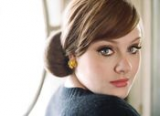
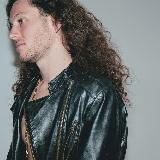
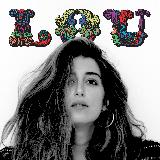
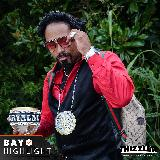
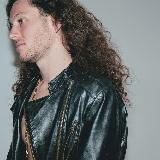

In [669]:
get_artist("Adele")

In [670]:
#Scrapes number of albums
def get_albums(artist):
    soup = get_artist(artist)
    albums = [titles.text for titles in soup.find_all('h3', {"class": "artist-album-label"})]
    return albums

albums = get_albums("Adele")
len(albums)

24

In [671]:
get_albums("Adele")

['Pal Joey [1980 London Cast Recording] [1998]',
 '19 [2008]',
 '19 [Bonus CD] [2008]',
 '19 [Deluxe Edition] [2008]',
 '19 [Japan Bonus Tracks] [2008]',
 'Chasing Pavements [2 Tracks] [2008]',
 'Ibiza Annual 2008 [2008]',
 'Make You Feel My Love [2008]',
 '90210 [2009]',
 'Love & War [2010]',
 '21 [2011]',
 '21 [2011]',
 '21 [Australian Bonus Track Edition] [2011]',
 '21 [Demo Bonus Tracks] [2011]',
 'Ibiza Annual 2011 [2011]',
 'Live at the Royal Albert Hall [2011]',
 'Live at the Royal Albert Hall [DVD+CD] [2011]',
 'Ministry of Sound: Addicted to Bass 2011 [2011]',
 'Rolling In the Deep (Jamie XX Shuffle) [2011]',
 'iTunes Festival: London 2011 [2011]',
 'Skyfall [2012]',
 '2013 Grammy Nominees [2013]',
 '25 [LP] [2015]',
 'Cover Stories: Brandi Carlile Celebrates 10 Years of the Story (An Album to Benefit War [2017]']

In [672]:
#Creates dictionary for songs and albums
def get_all_content(artist):
    soup = get_artist(artist)
    album_content_raw = soup.find('div', {"class": "tdata-ext"})
    album_content = album_content_raw.find_all('div',{"class": "clearfix"})
    dict = {}
    
    for t in album_content :
        album_title = t.find('h3', {"class": "artist-album-label"}).text
        song = t.find_all('strong')[2:]
        for song in song:
            dict[song] = album_title
    return dict
content = get_all_content("Adele")
len(content)

37

In [673]:
get_all_content("Adele")

{<strong><a href="/lyric/13856247/Adele/Crazy+for+You">Crazy for You</a></strong>: '19 [2008]',
 <strong><a href="/lyric/13856243/Adele/Daydreamer">Daydreamer</a></strong>: '19 [2008]',
 <strong><a href="/lyric/13856249/Adele/First+Love">First Love</a></strong>: '19 [2008]',
 <strong><a href="/lyric/13856254/Adele/Hometown+Glory">Hometown Glory</a></strong>: '19 [2008]',
 <strong><a href="/lyric/13856251/Adele/Make+You+Feel+My+Love">Make You Feel My Love</a></strong>: '19 [2008]',
 <strong><a href="/lyric/13856248/Adele/Melt+My+Heart+to+Stone">Melt My Heart to Stone</a></strong>: '19 [2008]',
 <strong><a href="/lyric/13856252/Adele/My+Same">My Same</a></strong>: '19 [2008]',
 <strong><a href="/lyric/13856250/Adele/Right+as+Rain">Right as Rain</a></strong>: '19 [2008]',
 <strong><a href="/lyric/13856253/Adele/Tired">Tired</a></strong>: '19 [2008]',
 <strong><a href="/lyric/14257143/Adele/My+Same+%5BLive%5D%5B%2A%5D">My Same [Live][*]</a></strong>: '19 [Bonus CD] [2008]',
 <strong><a hre

In [674]:
#URLs of songs 
def get_links_songs(artist):
    soup = get_all_content(artist)
    links = soup.keys()
    songLinks = []
    for l in links :
        song = l.find('a')
        songLinks.append("https://www.lyrics.com" + song.get('href'))
    return songLinks
songLinks = get_links_songs("Adele")
len(songLinks)

37

In [675]:
get_links_songs("Adele")

['https://www.lyrics.com/lyric/13856247/Adele/Crazy+for+You',
 'https://www.lyrics.com/lyric/13856243/Adele/Daydreamer',
 'https://www.lyrics.com/lyric/13856249/Adele/First+Love',
 'https://www.lyrics.com/lyric/13856254/Adele/Hometown+Glory',
 'https://www.lyrics.com/lyric/13856251/Adele/Make+You+Feel+My+Love',
 'https://www.lyrics.com/lyric/13856248/Adele/Melt+My+Heart+to+Stone',
 'https://www.lyrics.com/lyric/13856252/Adele/My+Same',
 'https://www.lyrics.com/lyric/13856250/Adele/Right+as+Rain',
 'https://www.lyrics.com/lyric/13856253/Adele/Tired',
 'https://www.lyrics.com/lyric/14257143/Adele/My+Same+%5BLive%5D%5B%2A%5D',
 'https://www.lyrics.com/lyric/14257144/Adele/That%27s+It%2C+I+Quit%2C+I%27m+Moving+On+%5BLive%5D%5B%2A%5D',
 'https://www.lyrics.com/lyric/19021290/The+Raconteurs/Many+Shades+of+Black+%5B%2A%5D',
 'https://www.lyrics.com/lyric/19021288/Adele/My+Same+%5BLive+at+Bimbos%2C+San+Francisco%5D+%5BNorth+American+Tour+Film%5D+%5BLiv',
 'https://www.lyrics.com/lyric/19021289

In [677]:
# Scrapes and finds lyrics for all songs
def get_all_lyrics(artist):
    songLinks = get_links_songs(artist)
    all_lyrics = {}
    count = 0
    for song in songLinks:
        page = r.get(song)
        soup = bs(page.content, 'html.parser')
        song_title = soup.find('h2')
        lyrics = [lyrics.text for lyrics in soup.find_all('pre')]
        all_lyrics[song_title.text] = lyrics[0]
        count = 0
        for key in all_lyrics.keys():
            count = count + len(all_lyrics[key])
    return all_lyrics, count
all_lyrics, count = get_all_lyrics("Adele")
print(len(all_lyrics))

37


In [678]:
get_all_lyrics("Adele")

({'Crazy for You': "Found myself today singing out your name,\nYou said I'm crazy,\nIf I am I'm crazy for you.\n\nSometimes sitting in the dark wishing you were here\nTurns me crazy,\nBut it's you who makes me lose my head.\n\nAnd every time I'm meant to be acting sensible\nYou drift into my head\nAnd turn me into a crumbling fool.\n\nTell me to run and I'll race,\nIf you want me to stop I'll freeze,\nAnd if you want me gone. I'll leave, just hold me closer baby,\nAnd make me crazy for you.\nCrazy for you.\n\nLately with this state I'm in I can't help myself but spin.\nI wish you'd come over,\nSend me spinning closer to you.\n\nMy oh my, how my blood boils, it's sweet taste for you,\nStrips me down bare\nAnd gets me into my favorite mood.\n\nI keep on trying, fighting these feelings away,\nBut the more I do,\nThe crazier I turn into.\n\nPacing floors and opening doors,\nHoping you'll walk through\nAnd save me boy,\nBecause I'm too crazy for you.\nCrazy for you",
  'Daydreamer': "Daydre

In [645]:
#Scrapes songs
def get_song(artist):
    page = r.get('https://www.lyrics.com/artist/' + artist)
    soup = bs(page.content, 'html.parser')
    song = [t.text for t in soup.find_all('strong')][2:]
    return song
song = get_song("Adele")

len(song)

78

In [680]:
get_song("Adele")

['That Terrific Rainbow',
 'Best for Last',
 'Cold Shoulder',
 'Crazy for You',
 'Daydreamer',
 'First Love',
 'Hometown Glory',
 'Make You Feel My Love',
 'Melt My Heart to Stone',
 'My Same',
 'Right as Rain',
 'Tired',
 'Chasing Pavements [Live][*]',
 'Melt My Heart to Stone [Live][*]',
 'My Same [Live][*]',
 "That's It, I Quit, I'm Moving On [Live][*]",
 'Hometown Glory [Acoustic] [Live]',
 'Make You Feel My Love [Acoustic] [Live]',
 'Many Shades of Black [*]',
 'My Same [Live at Bimbos, San Francisco] [North American Tour Film] [Liv',
 'Right as Rain [Live at Roxy, Los Angeles] [North American Tour Film] [L',
 'Now and Then [*]',
 'Painting Pictures [*]',
 "That's It, I Quit, I'm Moving On [*]",
 'Chasing Pavements',
 "That's It, I Quit, I'm Moving On",
 'Hometown Glory [Axwell Club Mix]',
 'Painting Pictures',
 'Many Shades of Black',
 'Water and a Flame',
 'I Found a Boy [*]',
 "Don't You Remember",
 "He Won't Go",
 "I'll Be Waiting",
 'Lovesong',
 'One and Only',
 'Rolling in t

In [681]:
# Returns the most common "non-stop" word
def stop_word(lyrics):
    import nltk
    nltk.download('punkt')
    from nltk.corpus import stopwords
    nltk.download("stopwords")
    from nltk.tokenize import word_tokenize 

    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(lyrics) 
    nonstop_lyrics = [w for w in word_tokens if not w in stop_words] 
    nonstop_lyrics = []
    for w in word_tokens: 
        if w not in stop_words: 
            nonstop_lyrics.append(w) 

    return nonstop_lyrics


In [682]:
stop_word("Yeah there's any shades of black")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nicolebohra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolebohra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Yeah', "'s", 'shades', 'black']

In [683]:
common = []
def get_mostCommon(nonstop_lyrics):
    common.append(max(set(nonstop_lyrics), key=nonstop_lyrics.count))
    return common
most_common = get_mostCommon("Yeah there's any shades shades shades")


In [684]:
get_mostCommon("Yeah there's shades shades shades")

['s', 's']

In [685]:
# Returns the total number of words in a given song
def totalWords(artist_name, song_name):
    lyrics = get_all_lyrics('Adele')
    for song in all_lyrics.keys():
        if song == song:
            words = all_lyrics.get(song).split(' ')
            numWords = len(words)
    return numWords

totalWords('Adele', 'Hello')
len(all_lyrics.keys())


37

In [691]:
# Saves columns in dataframe which is then converted to .csv file
lists = {'songs' : list(content.keys()), 'albums': list(content.values()), 'links': songLinks}

df = pd.DataFrame(data = lists)
df.to_csv('a8.csv')
    
